# Investigation on a Loan Dataset
## by Reem Abdel-Rahman

## Investigation Overview

> This investigation aims at studying the loans and what attributes could affect their status. The investigation focuses on the main characteristics of the loan such as the duration of the loan and its original amount and if these characteristics could change the status of the loan.  

## Dataset Overview

> The dataset consists of 113937 loans with 81 attributes, from which 7 attributes were chosen to study the status of the loans, whether they are completed, current, charged off, cancelled or due. The attributes of interest include the duration of the loan, the loan original amount, the employment status and whether the borrower owns a house. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of the Loan Status

The loans have different status. The most comment status is "Current" followed by "Completed". "Due" loans are much less than the completed ones. 

In [3]:
#https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe
loans['LoanStatus'] = loans['LoanStatus'].map({'Completed': 'Completed', 'Current': 'Current',
                                        'Past Due (1-15 days)': 'Due', 'Defaulted':'Defualted', 'Chargedoff': 'Chargedoff',
                                        'Past Due (16-30 days)': 'Due', 'Cancelled':'Cancelled',
                                        'Past Due (61-90 days)': 'Due', 'Past Due (31-60 days)': 'Due',
                                        'Past Due (91-120 days)': 'Due', 'FinalPaymentInProgress':'FinalPaymentInProgress',
                                        'Past Due (>120 days)': 'Due'});

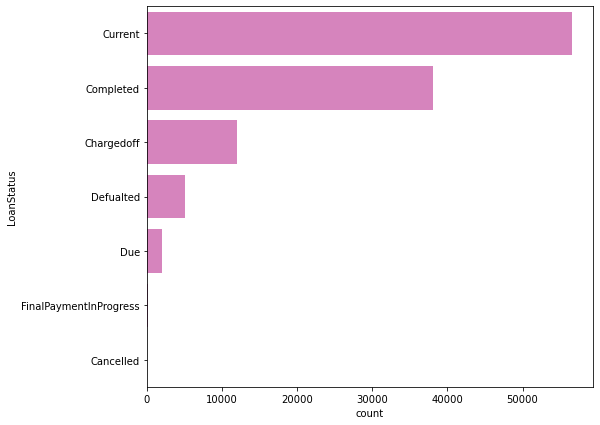

In [4]:
plt.figure(figsize = [8,7])
base_color = sb.color_palette()[6]
ordr = loans['LoanStatus'].value_counts().index
sb.countplot(data = loans, y = 'LoanStatus', color = base_color, order = ordr);

## Loan Duration

The borrowers in our dataset have chosen among three available loan's duration: 12, 36 and 60 months. Most of them chose the moderate amount of 36 months

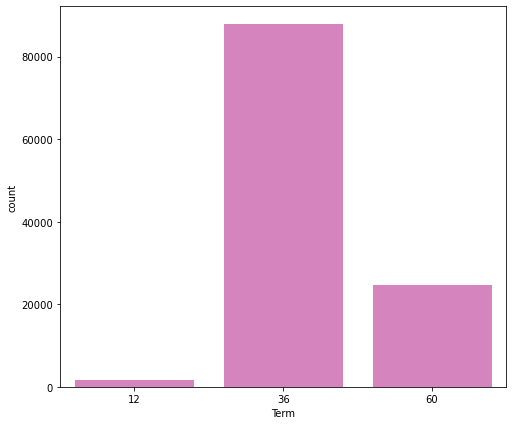

In [5]:
plt.figure(figsize = [8,7])
sb.countplot(data = loans, x = 'Term', color = base_color);

## Borrower's Attributes

For the borrowers, we took three attributes into account:
1. Is the borrower a house owner
2. The employment status, and
3. The duration of the employment

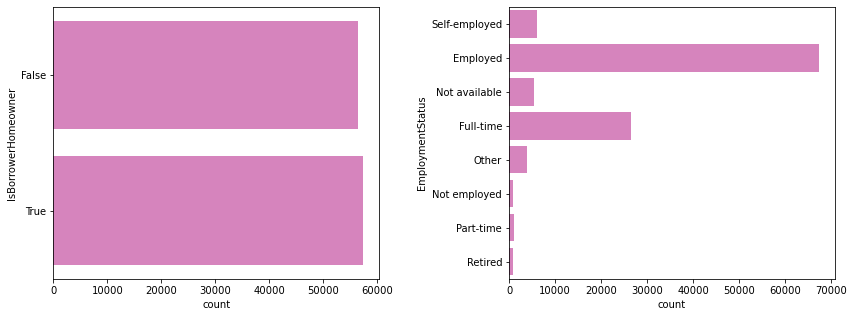

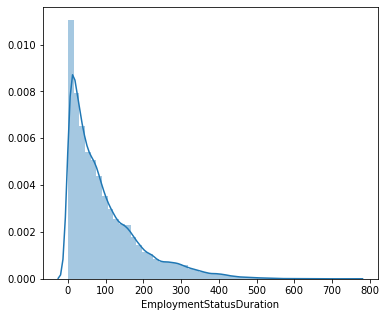

In [13]:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
plt.figure(figsize = [14,5])
plt.subplot(1,2,1)
sb.countplot(data = loans, y = 'IsBorrowerHomeowner', color = base_color);
plt.subplot(1,2,2)
sb.countplot(data = loans, y = 'EmploymentStatus', color = base_color);
plt.subplots_adjust(wspace=0.4);
plt.figure(figsize = [6,5])
sb.distplot(loans['EmploymentStatusDuration']);

## Annual Rate and Interest Rate
We studies the annual percentage rate and the interest rate. They have a strong positive correlation. 

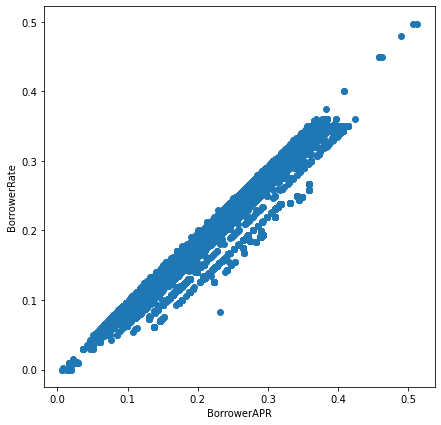

In [7]:
plt.figure(figsize = [7,7])
plt.scatter(data=loans, x = 'BorrowerAPR', y = 'BorrowerRate');
plt.xlabel('BorrowerAPR');
plt.ylabel('BorrowerRate');

## Relation between Loan Status and Ownership of a House 
- Does an ownership of a house encourage people to take loans? 
- Are people with tight financial conditions are more serious about repaying their debts? 

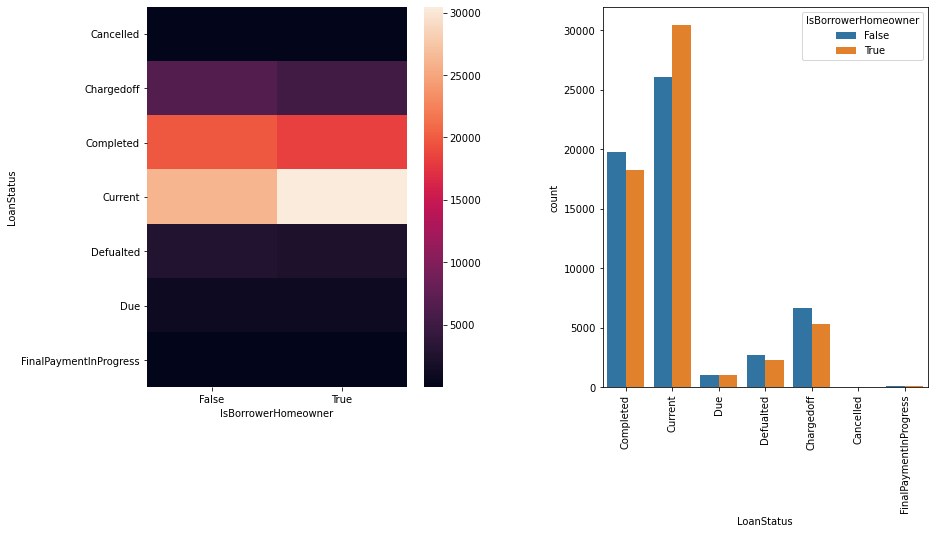

In [8]:
plt.figure(figsize = [14, 7])
plt.subplot(1,2,1)
ct_counts = loans.groupby(['LoanStatus','IsBorrowerHomeowner']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'IsBorrowerHomeowner', values = 'count')
sb.heatmap(ct_counts);
plt.subplot(1,2,2);
sb.countplot(data = loans, x = 'LoanStatus', hue = 'IsBorrowerHomeowner');
plt.xticks(rotation = 90);
plt.subplots_adjust(wspace=0.4);

## Relation between Loan Status and Employment Status
Among the people who have comleted their loans, the largest number have a full time job. The second largest number are employmed. Most of the people who take loans are employed. 

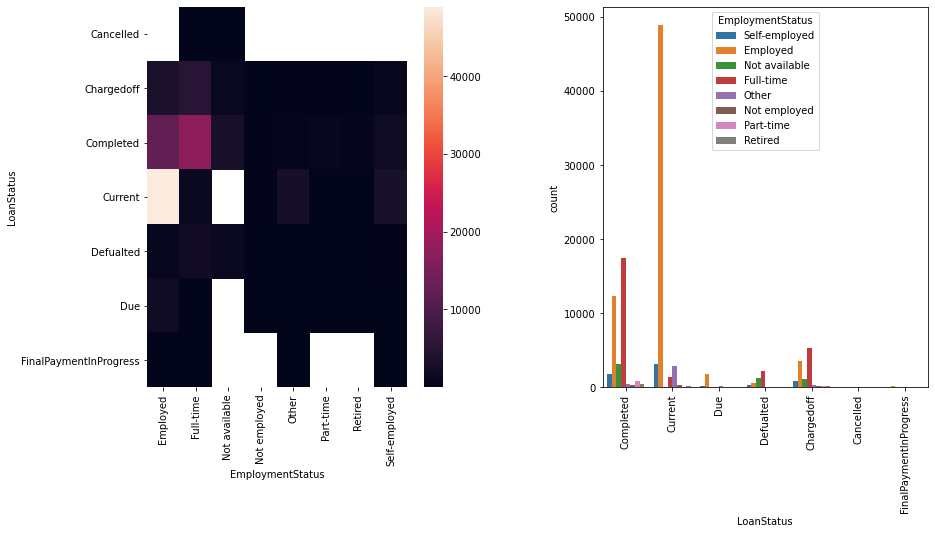

In [9]:
plt.figure(figsize = [14, 7])
plt.subplot(1,2,1)
ct_counts = loans.groupby(['LoanStatus','EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')
sb.heatmap(ct_counts);
plt.subplot(1,2,2);
sb.countplot(data = loans, x = 'LoanStatus', hue = 'EmploymentStatus');
plt.xticks(rotation = 90);
plt.subplots_adjust(wspace=0.4);

## Is Annual rate is affected by the ownership of a house?
For all the loan's status, the annual percentage rate is higher for poeple who do not own a house.

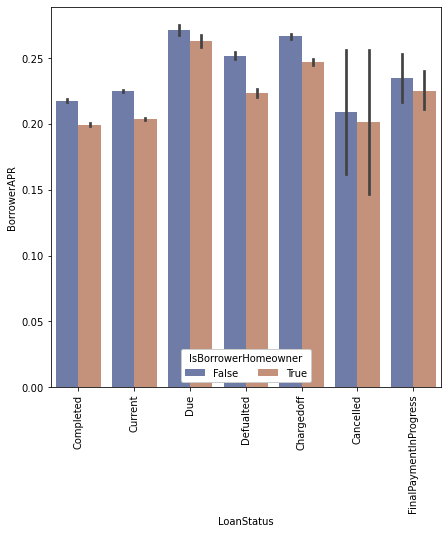

In [10]:
plt.figure(figsize = [7,7])
clr = sb.color_palette()[8]
ax = sb.barplot(data = loans, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', palette="dark", alpha=.6)
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'IsBorrowerHomeowner');
plt.xticks(rotation = 90);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!